In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp

In [2]:
df = pd.read_csv('heart.csv')
df.head()
df.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1  

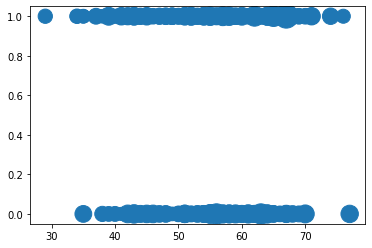

In [3]:
# Visualizing the dataset
plt.scatter(df['age'], df['target'], df['chol'])
plt.show()


In [4]:
X = df[["age", "sex"]]
y = df["target"]
y1 = list(y)
print(y1)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [5]:
def sigmoid(z):
    """
    z = b + W1x1 + W2x2 + ... + Wnxn
    """
    return 1 / (1 + np.exp(-z))


In [6]:
def normlize (X):
    return X - X.mean()

In [7]:
def cost(y, sigma):
    """
    X.shape = [row, column]  x.shape[0] = count of row
    np.dot = multiply x and w

    return the loss function
    """
    size = X.shape[0]
    
    loss = - 1 / size * np.sum(y * np.log(sigma) + (1 - y) * np.log(1 - sigma))
    return loss


In [8]:
def gradient_descent(X, y, learning_rate, weights, bias, sigma):
    size = X.shape[0]

    dw = 1/size * np.dot(X.T, (sigma - y))
    db = 1/size * np.sum(sigma - y)
    weights -= learning_rate * dw
    bias -= learning_rate * db 
    #print("gra   ", weights, bias)
    return weights, bias


In [9]:
def fit(X, y, lr, parameters, iter):
    """
    parameters is the dict with keys (weights, bias)
    weights is a zero matrix with length of x.row 
    bias the first time is 0
    """
    weights = parameters["weights"]
    bias = parameters["bias"]
    predictions = []
    for i in range(iter): 
        z = np.dot(X, weights) + bias
        sigma = sigmoid(z)
        loss = cost(y, sigma)
        weight, biases = gradient_descent(X, y, lr, weights, bias, sigma)
        
        parameters["weights"], parameters["bias"] = weight, biases
    #print(weight, biases)
    print(parameters["weights"])
    return parameters

In [10]:
def train (X, y, lr, iter):
    """
    return the dict parameters with updating weights and bias
    """
    set_parameters = {}
    set_parameters["weights"] = np.zeros(X.shape[1])
    set_parameters["bias"] = 0
   # print("tra ", set_parameters["weights"])
    parameters = fit(X, y, lr, set_parameters, iter)

    return parameters

In [11]:
#norm = normlize(X)
parameters = train(X, y, lr = 0.001, iter = 2000)

z = np.dot(X, parameters["weights"]) + parameters["bias"]
# print("z", z)
# print(sigmoid(z))
predictions = sigmoid(z) >= 0.5

accuracy = 0
# print(predictions)
# print(y1)
# print(predictions)


for i in range(X.shape[0]):
    if predictions[i] == y1[i]:
        accuracy += 1
prob = accuracy / X.shape[0]
print(f"Accuracy: {prob} ")

[ 0.00302794 -0.09731595]
Accuracy: 0.5412541254125413 


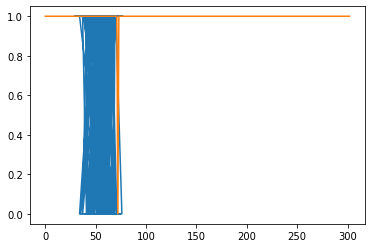

     age  sex
0     63    1
1     37    1
2     41    0
3     56    1
4     57    0
..   ...  ...
298   57    0
299   45    1
300   68    1
301   57    1
302   57    0

[303 rows x 2 columns]


In [12]:

plt.plot(X["age"], X["sex"], predictions)
plt.show()
print(X)

In [13]:
class LogisticRegression:
    def __init__(self,x,y):      
        self.intercept = np.ones((x.shape[0], 1))  
        self.x = np.concatenate((self.intercept, x), axis=1)
        self.weight = np.zeros(self.x.shape[1])
        self.y = y
         
    #Sigmoid method
    def sigmoid(self, x, weight):
        z = np.dot(x, weight)
        return 1 / (1 + np.exp(-z))
     
    #method to calculate the Loss
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
     
    #Method for calculating the gradients
    def gradient_descent(self, X, h, y):
        return np.dot(X.T, (h - y)) / y.shape[0]
 
     
    def fit(self, lr , iterations):
        for i in range(iterations):
            sigma = self.sigmoid(self.x, self.weight)
             
            loss = self.loss(sigma,self.y)
 
            dW = self.gradient_descent(self.x , sigma, self.y)
             
            #Updating the weights
            self.weight -= lr * dW
 
        return print('fitted successfully to data')
     
    #Method to predict the class label.
    def predict(self, x_new , treshold):
        x_new = np.concatenate((self.intercept, x_new), axis=1)
        result = self.sigmoid(x_new, self.weight)
        result = result >= treshold
        y_pred = np.zeros(result.shape[0])
        for i in range(len(y_pred)):
            if result[i] == True: 
                y_pred[i] = 1
            else:
                continue
                 
        return y_pred

In [15]:
lr = LogisticRegression(X, y)
lr.fit(0.001, 2000)
print(lr.predict(X, y))
y_pred = lr.predict(X, y)
accuracy = 0
# print(predictions)
# print(y1)
# print(predictions)

print(len(y_pred))

print(len(y), len(X))
for i in range(X.shape[0]):
    if y_pred[i] ==1:
        accuracy += 1
prob = accuracy / X.shape[0]
print(f"Accuracy: {prob} ")
print(accuracy)

fitted successfully to data
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
303
303 303
Accuracy: 0.45544554455445546 
138
